# Lab 08 - Optimization

In this Lab, we are going to implement and study the behavior of different gradient descent optimizers on classical test functions.

For inspiration (in particular for writing the functions to optiize on, and the visualizations), you can look at:

http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

https://en.wikipedia.org/wiki/Test_functions_for_optimization



## Exercise 01 - Test functions and plotting

In this exercise, you will have to implement one of the following functions:
- Rosenbrock
- Beale
- Goldentstein-Price

See https://en.wikipedia.org/wiki/Test_functions_for_optimization

Write a python function corresponding to  mathematical functions.

Then write two visualization functions:
- one to plot the 3D surface plot of a function (the function comes as argument)
- one to plot the 2D contour plot of a function



In [1]:
import numpy as np

def rose(x1, x2):
    return 100*(x2 - x1**2)**2 + (1 - x1)**2

def d_rose(x1, x2):
    d_rose_d_x1 = 100*(x2-x1**2)*2*(-2*x1) + 2*(1-x1)*(-1)
    d_rose_d_x2 = 100*(x2-x1**2)*2 
    
    return np.asarray([d_rose_d_x1, d_rose_d_x2])

def beale(x1, x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 \
            + (2.65 - x1 + x1*x2**3)**2

def d_beale(x1, x2):
    d_beale_d_x1 = (1.5 - x1 + x1*x2)*2*(-1 + x2) \
                 + (2.25 - x1 + x1*x2**2)*(-1 + x2**2)\
                 + (2.65 - x1 + x1*x2**3)*(-1 + x2**3)

    d_beale_d_x2 = (1.5 - x1 + x1*x2)*2*x1 \
                 + (2.25 - x1 + x1*x2**2)*x1*2*x2 \
                 + (2.65 - x1 + x1*x2**3)*x1*3*x2**2
    
    return np.asarray([d_beale_d_x1, d_beale_d_x2])


xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))



In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt

def plot_3d( func ):
    
    z = func(x, y)

    fig = plt.figure(figsize=(8, 5))
    ax = plt.axes(projection='3d', elev=50, azim=-50)

    ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    plt.show()
    
def plot_contour( func, path = None):
    
    
    z = func(x, y)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    if path is not None:
        ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

        
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    plt.show()

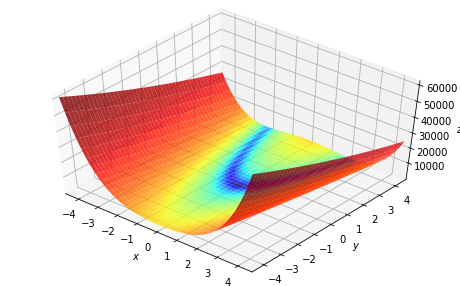

In [3]:
plot_3d(rose)

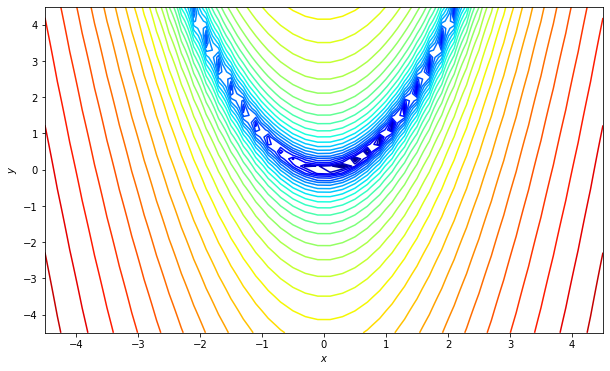

In [4]:
plot_contour(rose)

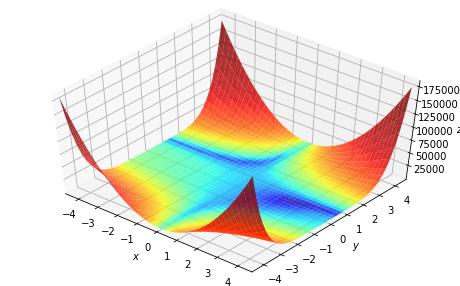

In [5]:
plot_3d(beale)

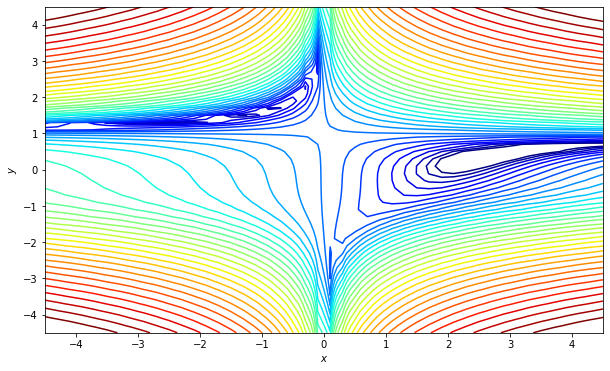

In [6]:
plot_contour(beale)

## Exercise 02

In this exercise, implement the 2 following optimizers:
- Adagrad
- RMSprop

They should include two stopping criterion:
- number of optimization steps
- distance to the actual minima is below a threshold

In [10]:
from abc import ABC, abstractmethod

class Optimizer(ABC):
    
    def __init__(self, d_function, starting_point, learning_rate, epochs):
        
        self.starting_point = starting_point
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.current_point = starting_point
        self.history = [starting_point]
        
        self.d_function = d_function
        
        
    def optimize(self):
        
        for epoch in range(self.epochs):
            
            jacobian = self.d_function(*self.current_point)
            new_point = self.step(jacobian)
            self.history.append(new_point)
            self.current_point = new_point
            
        self.history = np.asarray(self.history).T
            
    @abstractmethod
    def step(self, jac):
        pass
            
class Adagrad(Optimizer):
    
    def __init__(self, d_function, starting_point, learning_rate, epochs ):
        
        super().__init__(d_function, starting_point, learning_rate, epochs)
        
        self.jacobian_ss = np.zeros(2)
        self.epsilon = 1e-7

    def step(self,jac):
        
        self.jacobian_ss += jac**2
        
        new_point = self.current_point - self.learning_rate/np.sqrt(self.jacobian_ss+self.epsilon)*jac
        
        return new_point

class RMSProp(Adagrad):
    
    def __init__(self, d_function, starting_point, learning_rate, epochs ):
        
        super().__init__(d_function, starting_point, learning_rate, epochs)
        
        self.gamma = 0.9

    def step(self,jac):
        
        self.jacobian_ss = self.gamma * self.jacobian_ss + (1-self.gamma)*jac**2
        
        new_point = self.current_point - self.learning_rate/np.sqrt(self.jacobian_ss+self.epsilon)*jac
        
        return new_point


## Exercise 03 - Running the optimizers on the functions to find the global minima

Test the behaviors of each optimizer on the different loss function.

Plot the different optimiziation steps in the 2D contour plot.



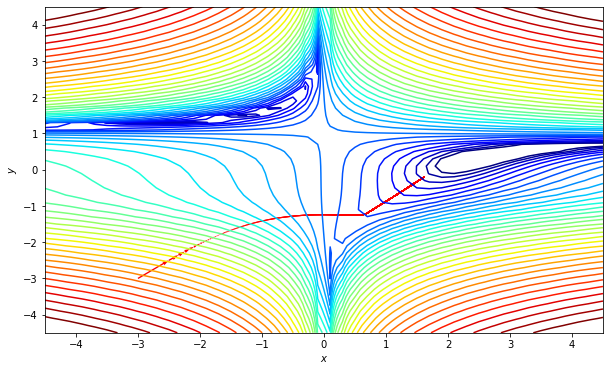

In [11]:
adag = Adagrad( d_beale, (-3, -3), 0.5, 10000)      
adag.optimize()

plot_contour(beale, adag.history)


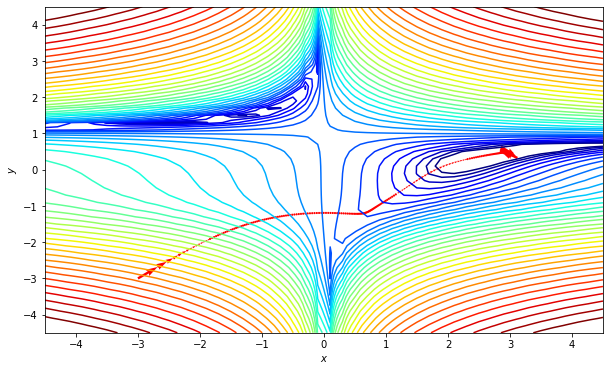

In [12]:
rmsp = RMSProp( d_beale, (-3, -3), 0.1, 200)      
rmsp.optimize()

plot_contour(beale, rmsp.history)